In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/3_outlier_IQR/heights.csv")
df

,name,height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [10]:
df.describe()

,height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


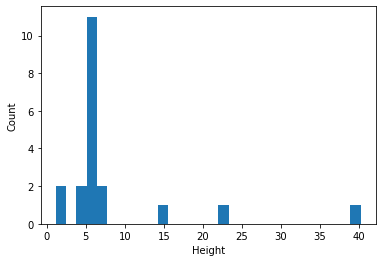

In [26]:
df['height'].plot(kind='hist',bins=30)
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

In [29]:
Q3=df.height.quantile(0.75)
Q1=df.height.quantile(0.25)

print(Q3)
print(Q1)

6.275
5.3500000000000005


In [28]:
IQR=Q3 -Q1
IQR

0.9249999999999998

In [32]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR

print(lower_limit)
print(upper_limit)

3.962500000000001
7.6625


Anything less than a lower limit or above the upper limit is considered outlier.

In [33]:
df[(df.height>upper_limit) | (df.height<lower_limit)]
# these are the outliers 

,name,height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [34]:
no_outlier= df[(df.height<upper_limit) & (df.height>lower_limit)]
no_outlier

,name,height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


Detected and removed the outliers using IQR 